## Correlation Techniques for Exploring Data Relationships

#### Correlation Techniques
    1. Pearson Correlation Coefficient
    2. Spearman's Rank Correlation Coefficient
    3. Point-Biserial Correlation Coefficient
    4. Phi Coefficient
    5. Cramer's V
    6. Distance Correlation

Check out the complete article here.

In [2]:
import matplotlib.pyplot as plt

def plot(x, y):
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, marker='o', linestyle='-', color='b', label='y = f(x)')
    plt.title("Plot of y vs. x")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.show()

#### 1. Pearson Correlation Coefficient
The Pearson correlation coefficient (often denoted as r) is a measure of the linear relationship between two continuous variables. It quantifies the degree to which two variables are linearly related.

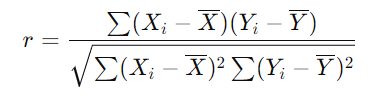

In [1]:
# pearson coefficient

def pearson_correlation(x, y):
    if len(x) != len(y):
        raise ValueError("Lists x and y must have the same length")
    n = len(x)

    x_mean = sum(x)/n
    y_mean = sum(y)/n

    numerator = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(n))
    denominator_x = sum((x[i] - x_mean)**2 for i in range(n))
    denominator_y = sum((y[i] - y_mean)**2 for i in range(n))

    denominator = (denominator_x * denominator_y) ** 0.5

    return numerator / denominator if denominator != 0 else 0

x = [10, 20, 30, 40, 50]
y = [12, 24, 36, 48, 60]

correlation = pearson_correlation(x, y)
print("Pearson correlation coefficient:", correlation)
plot(x,y)


Pearson correlation coefficient: 1.0


NameError: name 'plot' is not defined

In [ ]:
def rank(data):
    sorted_indices = sorted(range(len(data)), key = lambda i: data[i])
    ranks = [0] * len(data)
    for rank, index in enumerate(sorted_indices):
        ranks[index] = rank + 1
    return ranks

def spearman_rank_correlation(x, y):
    if len(x) != len(y):
        raise ValueError("Lists x and y must have the same length")

    rank_x = rank(x)
    rank_y = rank(y)

    d = [(rank_x[i] - rank_y[i]) for i in range(len(x))]
    d_squared = [diff ** 2 for diff in d]

    n = len(x)
    numerator = 6 * sum(d_squared)
    denominator = n * (n**2 - 1)

    return 1-(numerator/denominator)

x = [10, 20, 45, 21, 30, 43, 33, 16, 15]
y = [12, 30, 44, 23, 33, 47, 31, 14, 13]

correlation = spearman_rank_correlation(x, y)
print("Spearman's Rank Correlation Coefficient:", correlation)

Spearman's Rank Correlation Coefficient: 0.95


In [ ]:
def point_biserial_correlation(x, y):
    if not all(val in [0, 1] for val in y):
        raise ValueError("y must be a binary variable (containing only 0s and 1s)")

    # Split x into two groups based on the binary variable y
    x_0 = [x[i] for i in range(len(x)) if y[i]==0]
    x_1 = [x[i] for i in range(len(x)) if y[i]==1]

    # calculate means for the groups
    mean_x_0 = sum(x_0)/len(x_0) if len(x_0)>0 else 0
    mean_x_1 = sum(x_1)/len(x_1) if len(x_1)>0 else 0


    # Calculate the mean and standard deviation of x
    mean_x = sum(x)/len(x)
    std_x = (sum((xi - mean_x)**2 for xi in x)/len(x))** 0.5
    # Calculate the proportion of each group
    n_0 = len(x_0)
    n_1 = len(x_1)
    n = len(y)

    p0 = n_0 / n
    p1 = n_1 / n
    # Calculate the Point-Biserial Correlation Coefficient
    r_pb = (mean_x_1 - mean_x_0) / std_x * (p0 * p1) ** 0.5

    return r_pb

x = [4, 15, 8, 6, 10, 7, 13, 12, 11, 2]
y = [0, 1, 1, 0, 1, 0, 1, 1, 1, 0]


correlation = point_biserial_correlation(x, y)
print("Point-Biserial Correlation Coefficient:", correlation)

Point-Biserial Correlation Coefficient: 0.8437499999999999


In [ ]:
def phi_coefficient(x, y):
    if not (all(val in [0, 1] for val in x) and all(val in [0, 1] for val in y)):
        raise ValueError("Both x and y must be binary variables (containing only 0s and 1s)")

    # Calculate the contingency table components
    n00 = sum(1 for i in range(len(x)) if x[i] == 0 and y[i] == 0)
    n01 = sum(1 for i in range(len(x)) if x[i] == 0 and y[i] == 1)
    n10 = sum(1 for i in range(len(x)) if x[i] == 1 and y[i] == 0)
    n11 = sum(1 for i in range(len(x)) if x[i] == 1 and y[i] == 1)

    print("Contingency Table:")
    print(f"n00 (x=0, y=0): {n00}")
    print(f"n01 (x=0, y=1): {n01}")
    print(f"n10 (x=1, y=0): {n10}")
    print(f"n11 (x=1, y=1): {n11}")

    # Calculate the Phi coefficient
    numerator = n11 * n00 - n10 * n01
    denominator = ((n11 + n10) * (n11 + n01) * (n00 + n10) * (n00 + n01)) ** 0.5

    return numerator / denominator if denominator != 0 else 0

x = [1] * 30 + [1] * 10 + [0] * 20 + [0] * 40
y = [1] * 30 + [0] * 10 + [1] * 20 + [0] * 40


phi = phi_coefficient(x, y)
print("Phi Coefficient:", phi)


Contingency Table:
n00 (x=0, y=0): 40
n01 (x=0, y=1): 20
n10 (x=1, y=0): 10
n11 (x=1, y=1): 30
Phi Coefficient: 0.4082482904638631


In [ ]:
def cramers_v(x, y):
    if len(x) != len(y):
        raise ValueError("Lists x and y must have the same length")

    # Create the contingency table
    unique_x = list(set(x))
    unique_y = list(set(y))

    contingency_table = [[0 for _ in range(len(unique_y))] for _ in range(len(unique_x))]
    for i in range(len(x)):
        contingency_table[unique_x.index(x[i])][unique_y.index(y[i])] += 1
    print(contingency_table)
    # Calculate the chi-squared statistic
    chi2 = 0
    n = len(x)
    row_totals = [sum(row) for row in contingency_table]
    col_totals = [sum(col) for col in zip(*contingency_table)]

    for i in range(len(unique_x)):
        for j in range(len(unique_y)):
            expected = (row_totals[i] * col_totals[j]) / n
            chi2 += (contingency_table[i][j] - expected) ** 2 / expected

    # Calculate Cramér's V
    min_dim = min(len(unique_x) - 1, len(unique_y) - 1)
    cramers_v_value = (chi2 / (n * min_dim)) ** 0.5

    return cramers_v_value

x = ['A', 'B', 'A', 'B', 'A', 'B', 'C', 'C']
y = ['X', 'Y', 'X', 'Y', 'Z', 'Z', 'X', 'Y']

cramers_v_value = cramers_v(x, y)
print("Cramér's V:", cramers_v_value)

[[0, 2, 1], [1, 1, 0], [2, 0, 1]]
Cramér's V: 0.5270462766947298


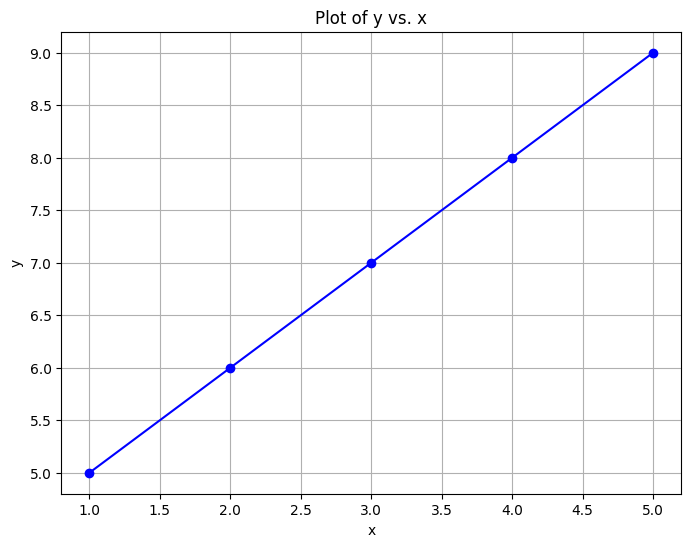

Distance Correlation: 1.0


In [ ]:
def distance_matrix(data):
    n = len(data)
    dist_matrix = [[0] * n for _ in range(n)]

    for i in range(n):
        for j in range(n):
            dist_matrix[i][j] = abs(data[i] - data[j])

    return dist_matrix

def double_centered_matrix(dist_matrix):
    n = len(dist_matrix)
    row_means = [sum(row) / n for row in dist_matrix]
    col_means = [sum(col) / n for col in zip(*dist_matrix)]
    overall_mean = sum(row_means) / n

    centered_matrix = [[0] * n for _ in range(n)]

    for i in range(n):
        for j in range(n):
            centered_matrix[i][j] = (dist_matrix[i][j]
                                     - row_means[i]
                                     - col_means[j]
                                     + overall_mean)

    return centered_matrix

def distance_covariance(x, y):
    n = len(x)
    assert len(x) == len(y), "Both vectors must be of the same length"

    dist_matrix_x = distance_matrix(x)
    dist_matrix_y = distance_matrix(y)

    centered_matrix_x = double_centered_matrix(dist_matrix_x)
    centered_matrix_y = double_centered_matrix(dist_matrix_y)

    dist_cov = sum(centered_matrix_x[i][j] * centered_matrix_y[i][j]
                   for i in range(n)
                   for j in range(n)) / (n * n)

    return dist_cov ** 0.5

def distance_variance(x):
    return distance_covariance(x, x)

def distance_correlation(x, y):
    dist_cov_xy = distance_covariance(x, y)
    dist_var_x = distance_variance(x)
    dist_var_y = distance_variance(y)

    if dist_var_x * dist_var_y == 0:
        return 0
    else:
        return dist_cov_xy / (dist_var_x * dist_var_y) ** 0.5

x = [1, 2, 3, 4, 5]
y = [5, 6, 7, 8, 9]

dcor = distance_correlation(x, y)
plot(x,y)
print("Distance Correlation:", dcor)


In [ ]:
import numpy as np
# generate linear relationship
x_l = np.linspace(0,10,100)
y_l0 = 2.0+0.1*x_l

# generate exponential linear relationship
x_e = np.linspace(0,10,100)
y_e0 = np.exp((x_e+2) ** 0.5)*x_l


# generate quadriatic relationship
x_q = np.linspace(-10,10,100)
y_q0 = 2.0+0.7*x_q**2 + 0.5*x_q


# generate sinusoidal relationship
x_s = np.linspace(-3,2,100)
y_s0 = np.exp(-(x_s+2) ** 2) + np.cos((x_s-2)**2)

linear relationship
pearson= 1.0
dcorr= 0.999999999999999


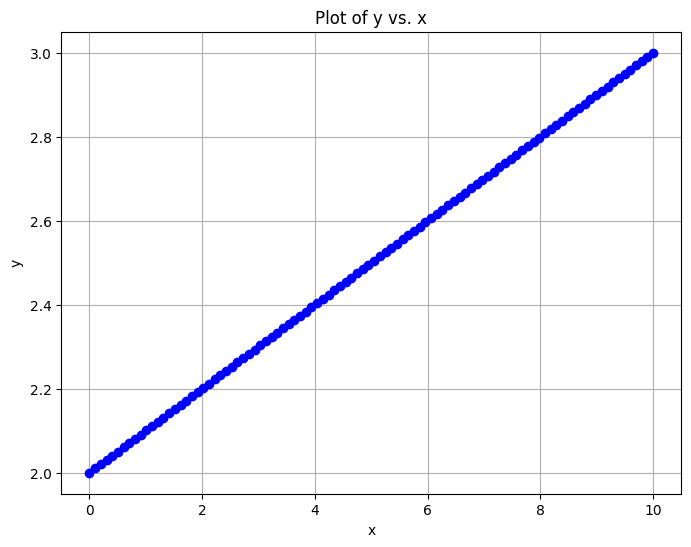

In [ ]:
print('linear relationship')
print('pearson=',np.corrcoef(x_l,y_l0)[0,1])
print('dcorr=',distance_correlation(x_l,y_l0))

plot(x_l, y_l0)


exponential linear relationship
pearson= 0.9552258273331249
dcorr= 0.9748938933663972


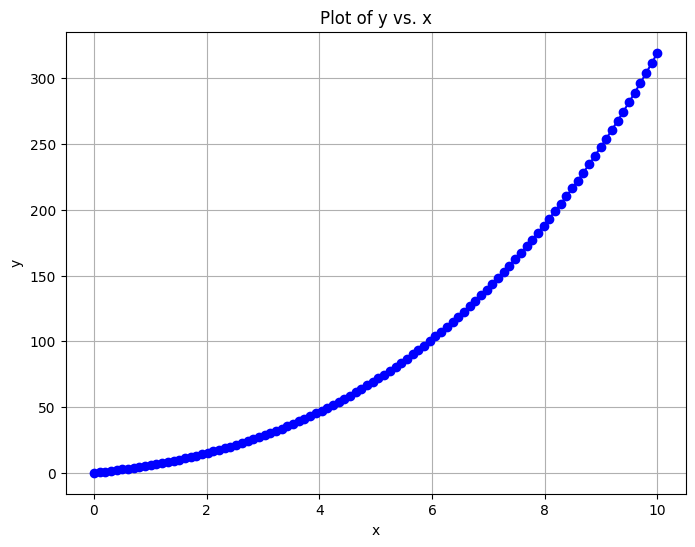

In [ ]:

print('\nexponential linear relationship')
print('pearson=',np.corrcoef(x_e,y_e0)[0,1])
print('dcorr=',distance_correlation(x_e,y_e0))

plot(x_e, y_e0)


quadritic  relationship
pearson= 0.13569812627453137
dcorr= 0.5048135300577155


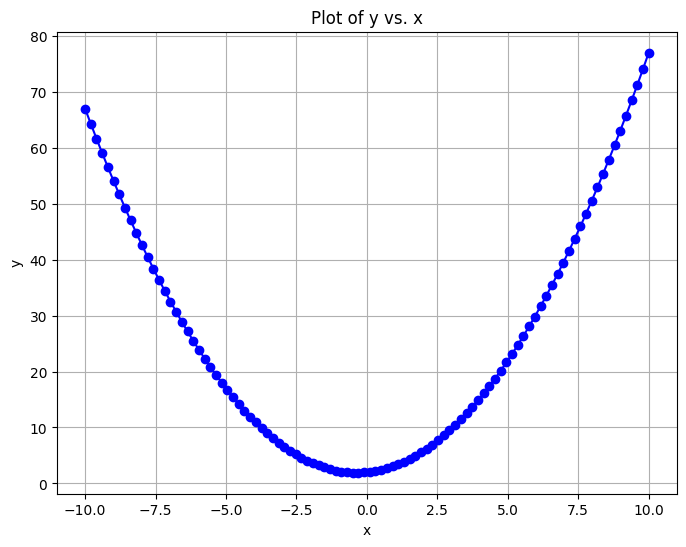

In [ ]:

print('\nquadritic  relationship')
print('pearson=',np.corrcoef(x_q,y_q0)[0,1])
print('dcorr=',distance_correlation(x_q,y_q0))

plot(x_q, y_q0)


sinusoidal relationship
pearson= -0.12362460633319425
dcorr= 0.3555637475766602


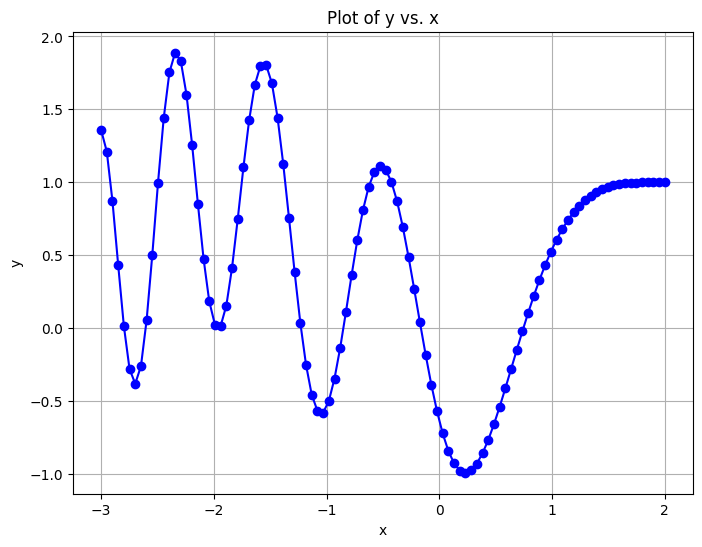

In [ ]:

print('\nsinusoidal relationship')
print('pearson=',np.corrcoef(x_s,y_s0)[0,1])
print('dcorr=',distance_correlation(x_s,y_s0))
plot(x_s, y_s0)